# Regression Analysis on California Housing

### Assumptions of Linear Regression

from: https://www.statisticssolutions.com/assumptions-of-linear-regression/

Linear regression is an analysis that assesses whether one or more predictor variables explain the dependent (criterion) variable.  The regression has five key assumptions:

    Linear relationship
    Normality of Residuals
    No or little multicollinearity
    No auto-correlation of Errors
    Homoscedasticity

**A note about sample size.  In Linear regression the sample size rule of thumb is that the regression analysis requires at least 20 cases per independent variable in the analysis.** 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# #Import Necessary Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # load seaborn's default theme and color palette to the session.
from math import sqrt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score,validation_curve,KFold
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import statsmodels.api as sm    # R_Square and Adjusted R Square
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, LassoCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
import platform
print(platform.python_version())

3.10.13


In [3]:
import sklearn
print(sklearn.__version__)

1.4.0


### Data Preparation

#### California Housing Data Set Description 
    from https://www.kaggle.com/datasets/camnugent/california-housing-prices
    
    Home prices in California in 1990 from the California Census. 

    The columns are as follows:
        longitude:              Longitude value for the block in California, USA
        latitude:               Latitude value for the block in California, USA
        housing_median_age:     Median age of the house in the block
        total_rooms:            Count of the total number of rooms (excluding bedrooms) in all houses in the block
        total_bedrooms :        Count of the total number of bedrooms in all houses in the block
        population:             Count of the total number of population in the block
        households:             Count of the total number of households in the block
        median_income:          Median of the total household income of all the houses in the block
        median_house_value:     Type of the landscape of the block 
        ocean_proximity:        Type of the landscape of the block 
        

### Reading data

In [4]:
url = "housing.csv"

housing = pd.read_csv(url, delimiter=',')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### Exploratory Data Analysis

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#Looking for null values
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Check any duplicates rows
housing[housing.duplicated(keep=False)].sum()

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity         0
dtype: object

In [8]:
housing['median_income'] = housing['median_income'] * 10000  # (measured in tens of thousands of US Dollars)
housing.describe(percentiles = [0.25, 0.5, 0.75, 0.9], include = "all")

longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.569704     35.631861           28.639486   2635.763081   
std         2.003532      2.135952           12.585558   2181.615252   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1447.750000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3148.000000   
90%      -117.250000     38.480000           46.000000   4651.500000   
max      -114.310000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     20433.000000  20640.000000  20640.000000   20640.000000   
unique             NaN           NaN           NaN            NaN   
top                NaN           NaN           NaN            NaN   
freq               NaN           NaN           NaN            NaN   
mean        537.870553   1425.476744    499.539680   38706.710029   
std         421.385070   1132.462122    382.329753   18998.217179   
min           1.000000      3.000000      1.000000    4999.000000   
25%         296.000000    787.000000    280.000000   25634.000000   
50%         435.000000   1166.000000    409.000000   35348.000000   
75%         647.000000   1725.000000    605.000000   47432.500000   
90%         965.000000   2566.000000    890.000000   61592.100000   
max        6445.000000  35682.000000   6082.000000  150001.000000   

        median_house_value ocean_proximity  
count         20640.000000           20640  
unique                 NaN               5  
top                    NaN       <1H OCEAN  
freq                   NaN            9136  
mean         206855.816909             NaN  
std          115395.615874             NaN  
min           14999.000000             NaN  
25%          119600.000000             NaN  
50%          179700.000000             NaN  
75%          264725.000000             NaN  
90%          376600.000000             NaN  
max          500001.000000             NaN

Oberservations:

   * 90 % of districts have a median housing age of under 46
   * only ocean proximity has 5 unique values, most frequent (top) being <1H OCEAN and it occurs 9136 times (freq)
   * through using include = "all" ocean proximity is in there too now (scroll to very right)

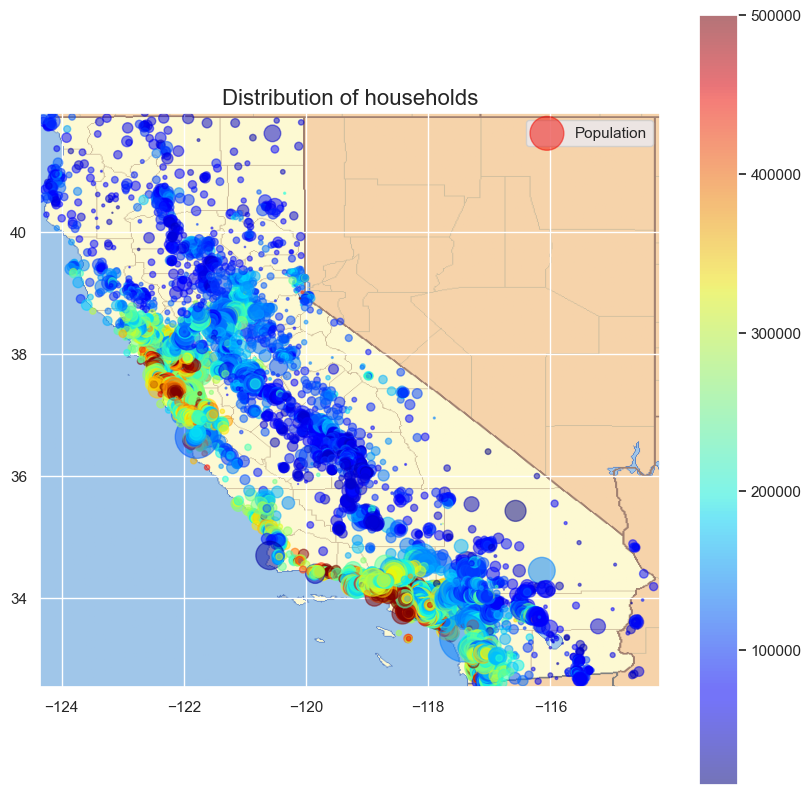

In [9]:
# https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb

plt.figure(figsize=(10,10))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=housing['longitude'],y=housing['latitude'],alpha=0.5,s=housing['population']/30,c=housing['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

From above plot we can infer that,

    Housing prices are much related to location and population density.
    Housing prices near ocean are higher except in northern california.
    High population mostly located in Bay Area and Los Angeles.


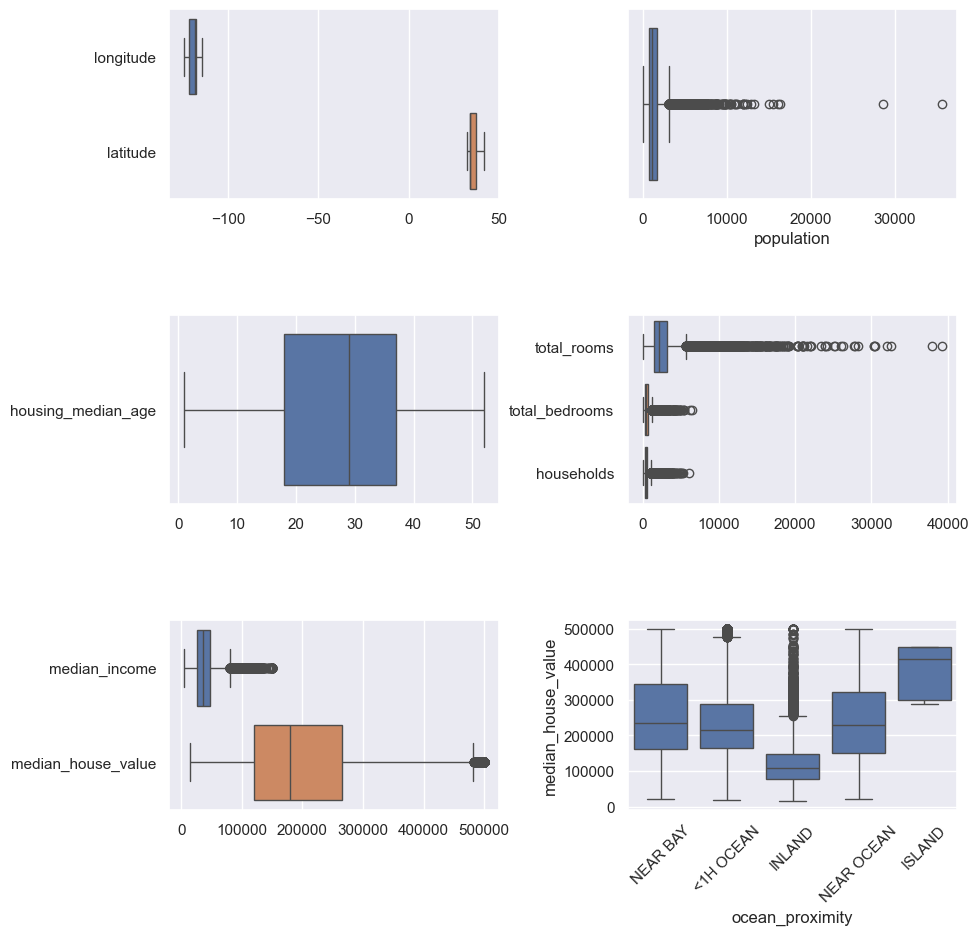

<Figure size 300x300 with 0 Axes>

In [10]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(figsize=(10,10), nrows=3, ncols=2)
fig.tight_layout(pad=5.0)

# Create plots using Seaborn

plt.figure(figsize=(3,3))
sns.boxplot(data= housing.iloc[:,0:2], orient="h", ax=axes[0, 0])
sns.boxplot(data= housing.iloc[:,5], orient="h", ax=axes[0, 1])
sns.boxplot(data= housing.iloc[:,2:3], orient="h", ax=axes[1, 0])
sns.boxplot(data= housing.iloc[:,[3,4,6]], orient="h", ax=axes[1, 1])
sns.boxplot(data= housing.iloc[:,7:10], orient="h", ax=axes[2, 0])
sns.boxplot(x="ocean_proximity", y="median_house_value", data=housing, ax=axes[2, 1])
axes[2, 1].tick_params(axis='x', labelrotation=45)



In [11]:
#sns.pairplot(housing.iloc[:,2:9])

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

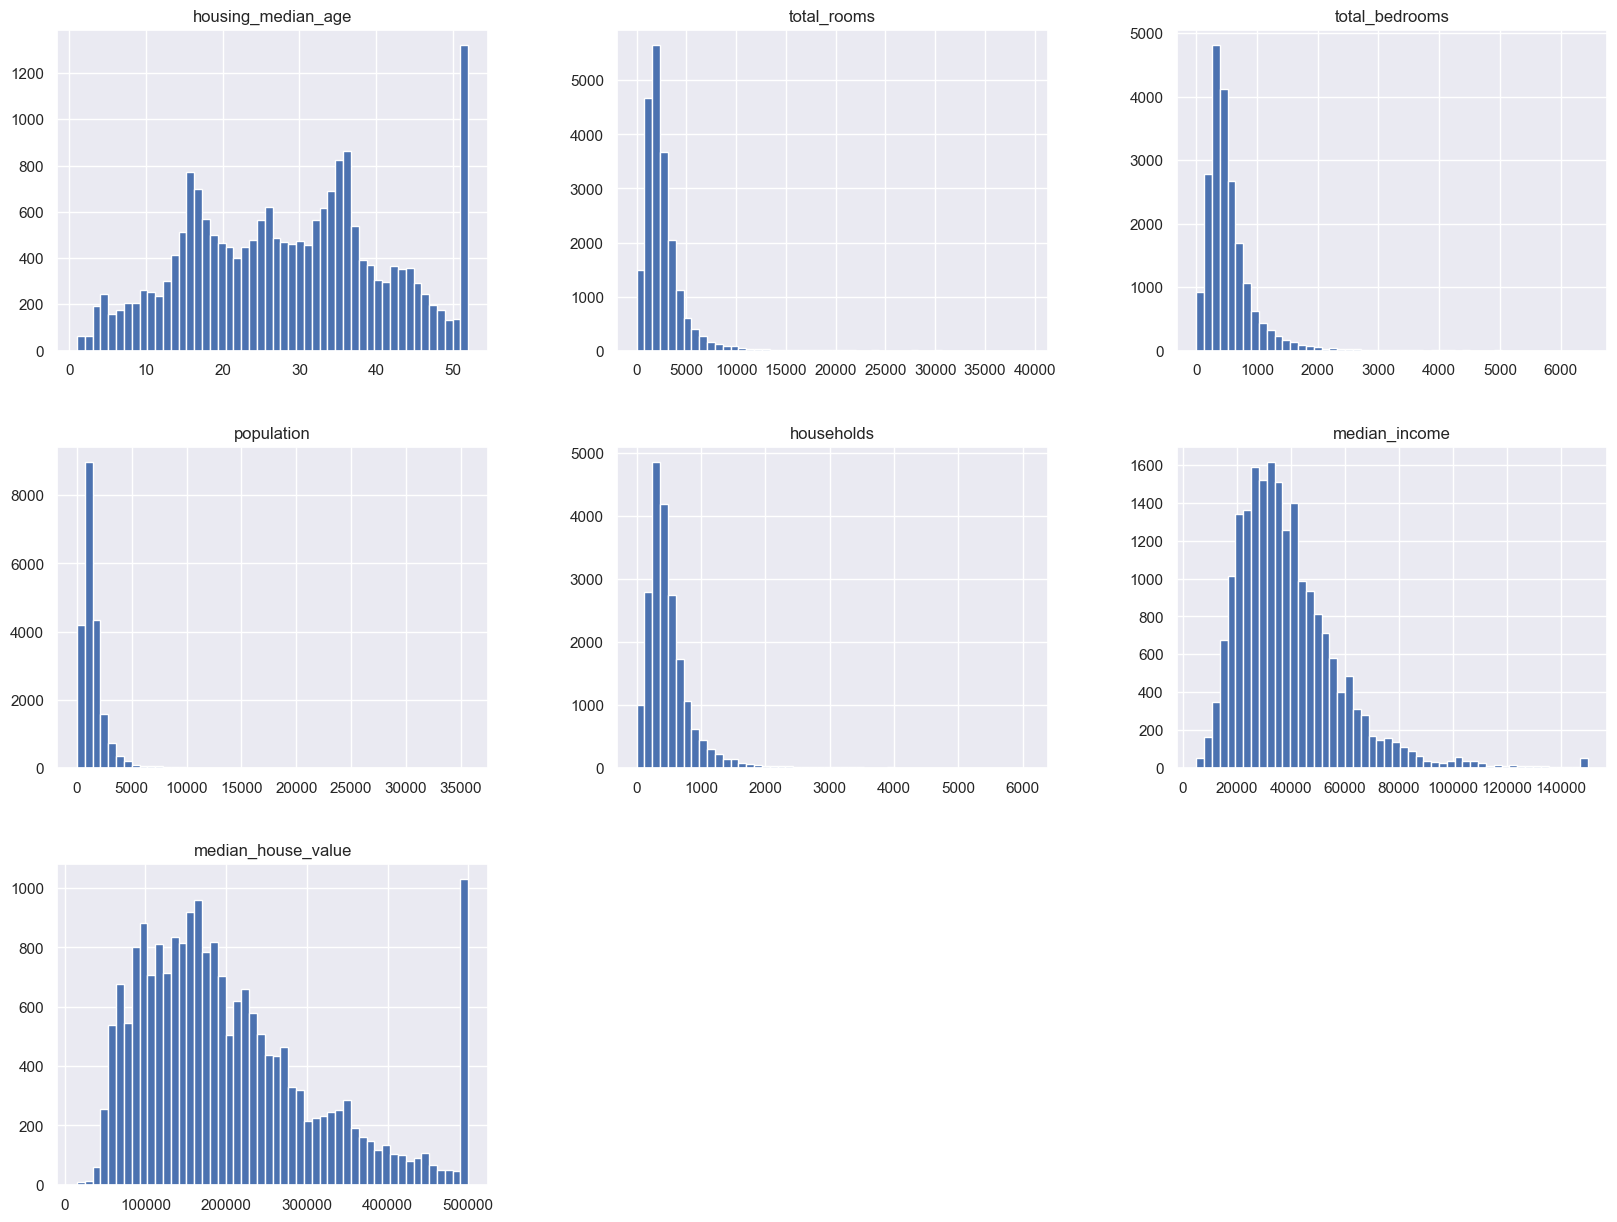

In [12]:
housing.iloc[:,2:9].hist(figsize=(20,15),bins=50)

<Axes: xlabel='housing_median_age', ylabel='Density'>

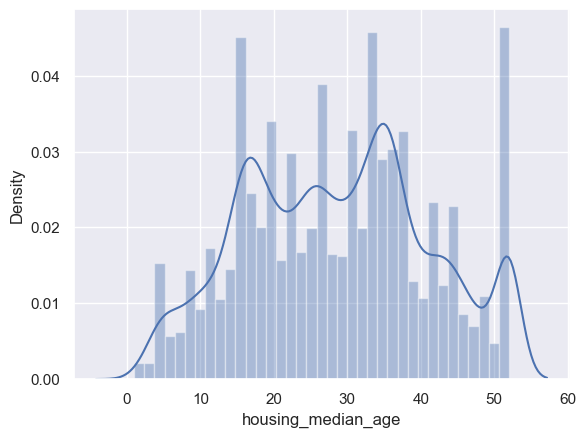

In [13]:
sns.distplot(housing['housing_median_age'],kde=True)

import scipy.stats as stats
stats.probplot(housing['housing_median_age'], dist="norm", plot=plt)
plt.show()

#### Except housing_median_age, all are Right-Skew

Text(0, 0.5, 'Median_house_value $')

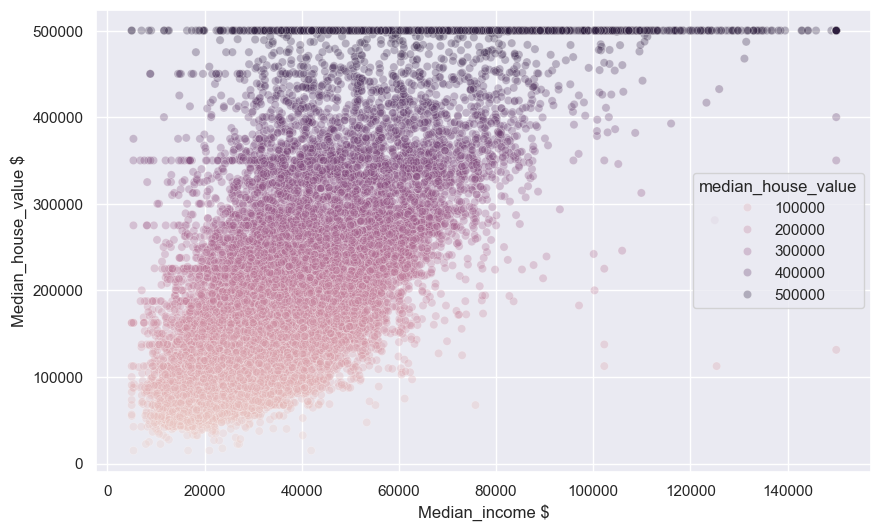

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=housing['median_income'], y=housing['median_house_value'],
            alpha=0.3                  # The alpha argument of the function controls the transparency of the markers.
               ,hue=housing['median_house_value']) 
plt.xlabel('Median_income $')
plt.ylabel('Median_house_value $')

### A clear line can be seen at 500k at which the data is capped. Similar lines can be seen around 450k,350k, 280k. This kind of data may degrade the performance of model.

Text(0.5, 0, 'population')

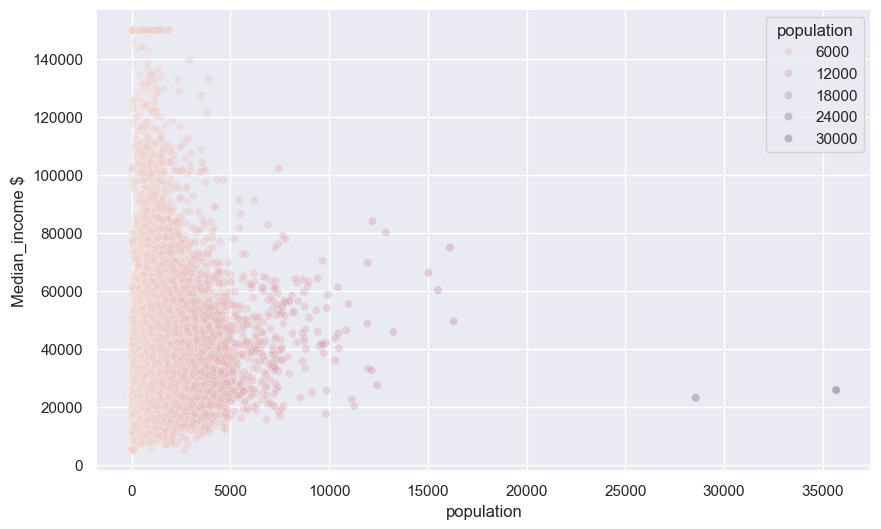

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=housing['median_income'], x=housing['population'],
            alpha=0.3               # The alpha argument of the function controls the transparency of the markers.
               ,hue=housing['population']) 
plt.ylabel('Median_income $')
plt.xlabel('population')

#### Small proportion of population have high median income (above \$140,000), and great proportion (outliers) of population low median income

### Impute the missing values in the data set ('total_bedrooms')

In [16]:
# https://www.kaggle.com/code/manisood001/california-housing-optimised-modelling/notebook
# we will calculate the median for total_bedrooms based  upon categories of ocean_proximity column

def calc_categorical_median(x):
    """this function fill the missing values of total_bedrooms based upon categories of ocean_proximity"""
    unique_colums_ocean_proximity=x['ocean_proximity'].unique()
    for i in unique_colums_ocean_proximity:
        median=x[x['ocean_proximity']==i]['total_bedrooms'].median()
        x.loc[x['ocean_proximity']==i,'total_bedrooms'] =  x[x['ocean_proximity']==i]['total_bedrooms'].fillna(median)
        

In [17]:
housing_copy = housing.copy()
calc_categorical_median(housing_copy)

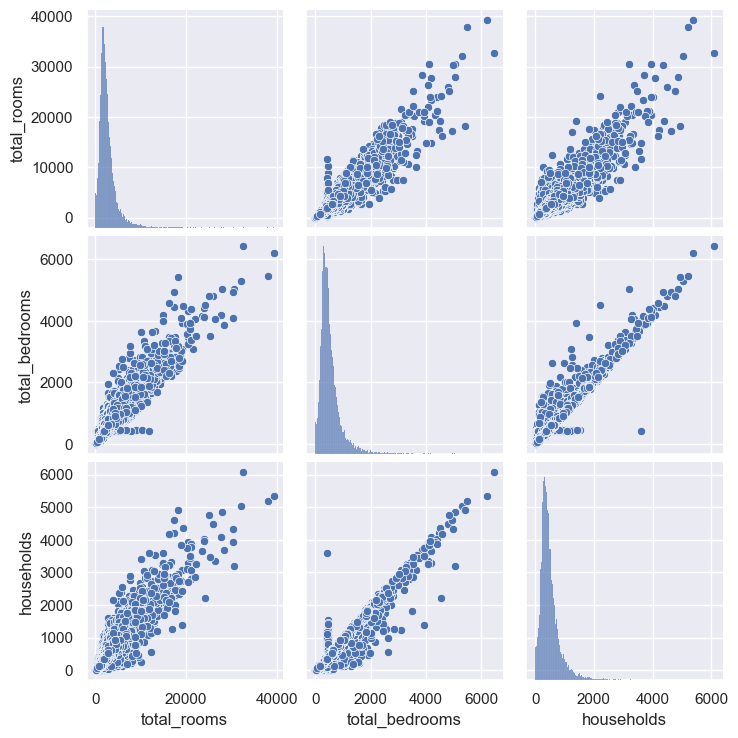

In [18]:
sns.pairplot(housing_copy.iloc[:,[3,4,6]])

#### if impute missing values with median, there a clear short line can be seen at ~500 on 'total_bedroom' with 'total_room" and 'households'

In [19]:
housing_copy.dropna(axis=0, how='any', inplace=True)
housing_copy.shape

(20640, 10)

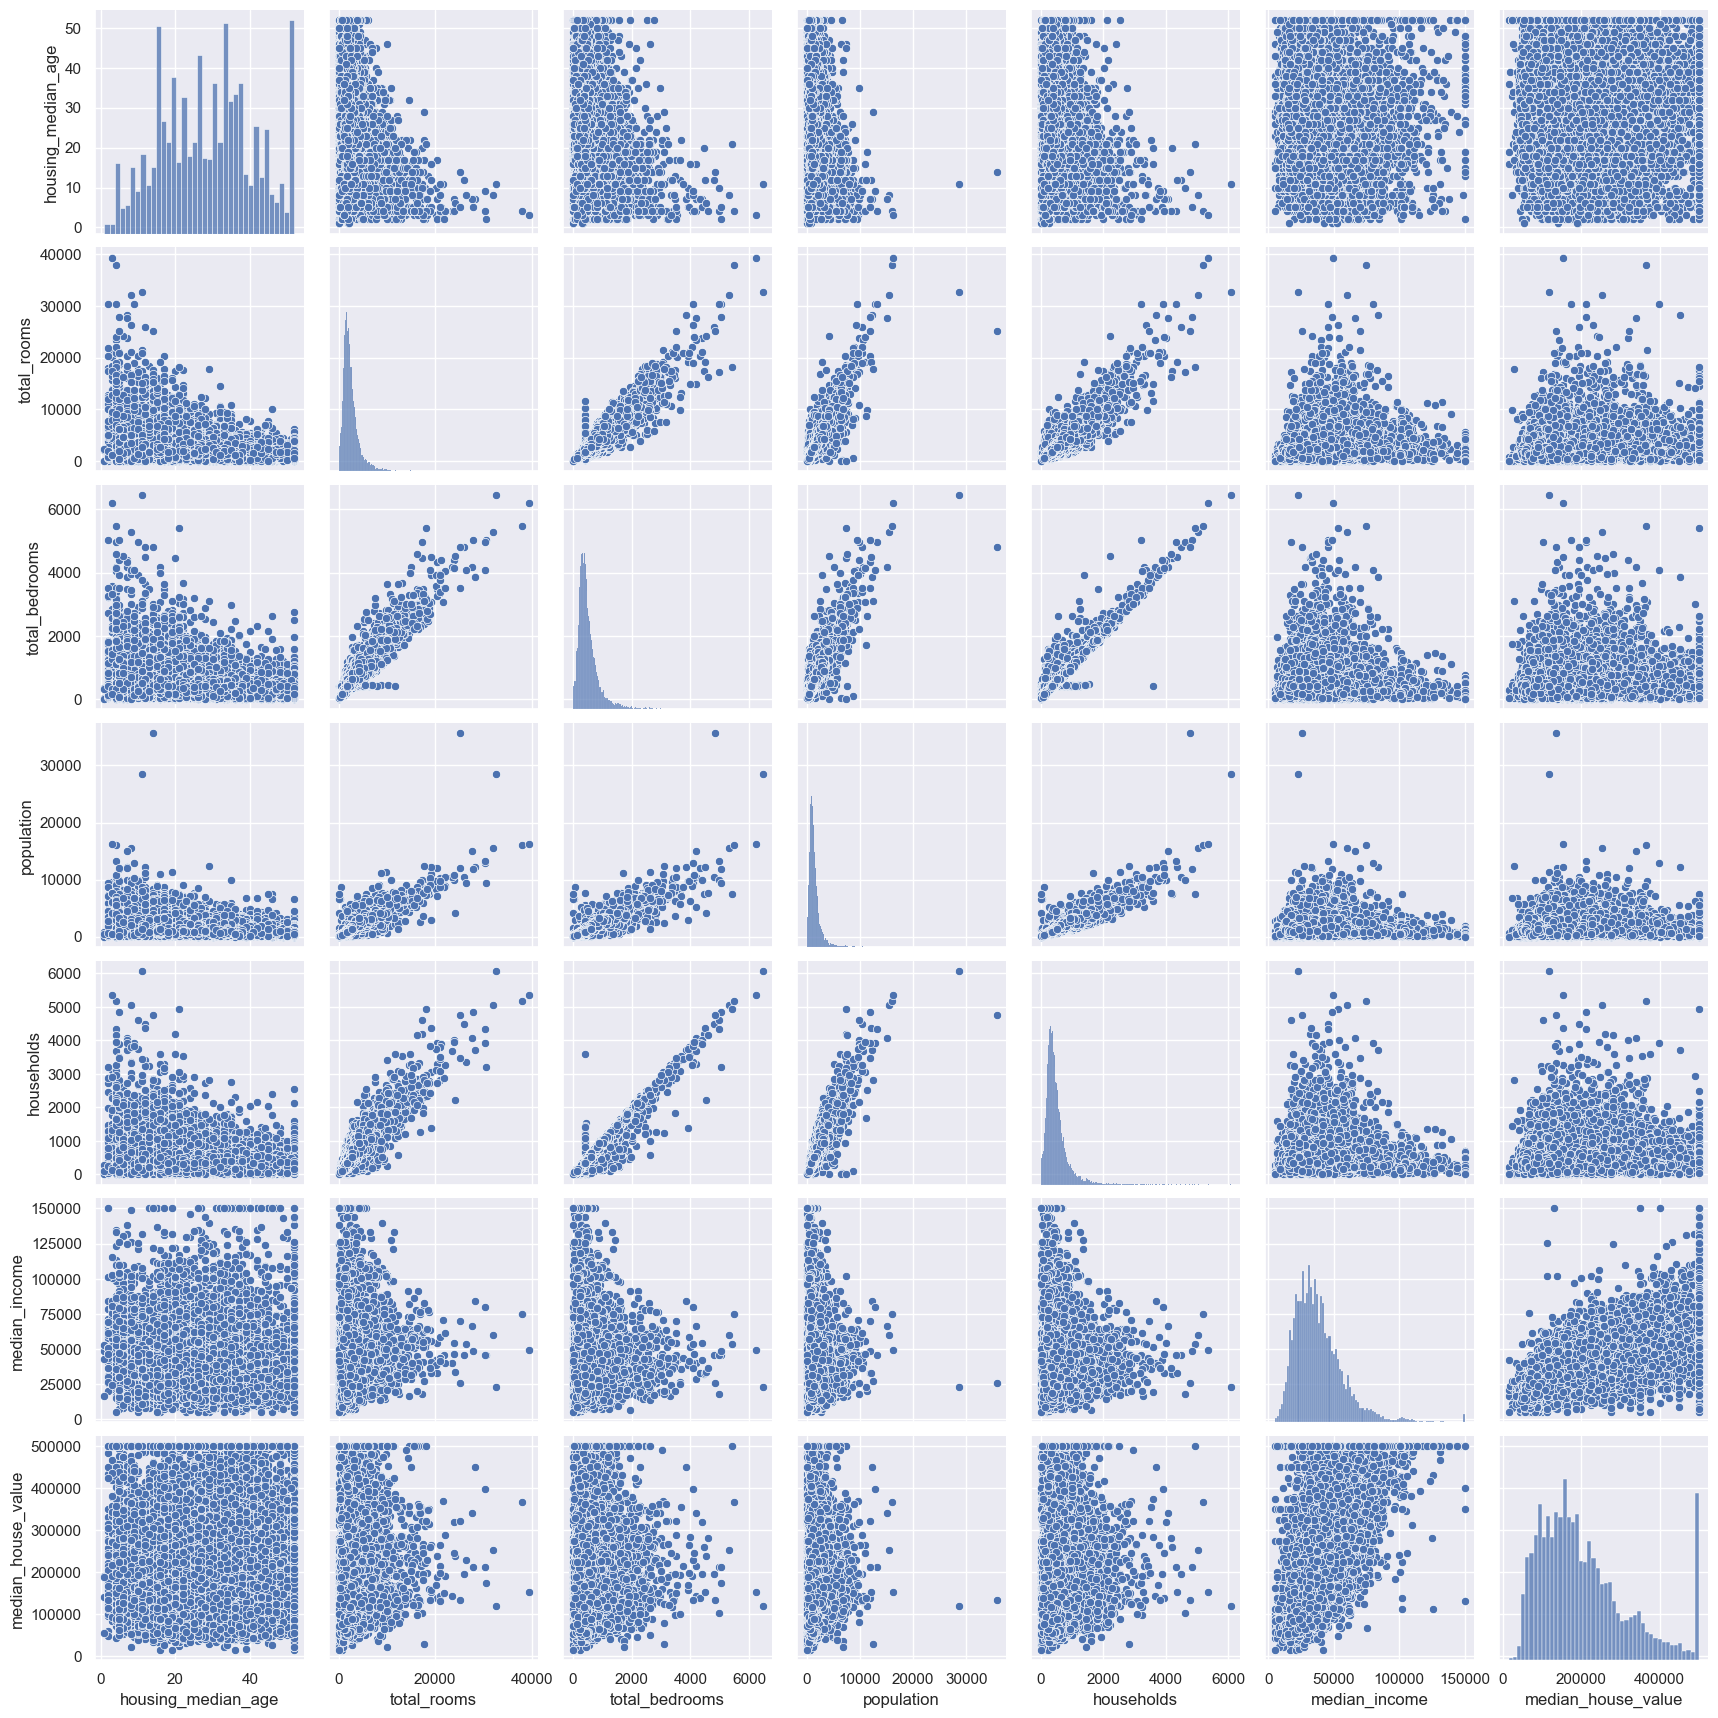

In [20]:
sns.pairplot(housing_copy.iloc[:,2:9])

### Removing outliers
https://github.com/aadityab7/Housing-Price-Prediction-Project-1/blob/ceae68000306165183c19523ebc0f58df89eceed/Housing_Price_Prediction%20Complete.ipynb

We can remove outliers from our dataset using Z-score OR using Interquartile range (IQR)

    Outlier = z-score less than -3 or greater than 3. 

    Outliers = Observations > Q3 + 1.5 * IQR or Q1 – 1.5 * IQR


We can use Z-score to remove outliers from Normally distributed features.

And use IQR to remove outliers from features with Skewed distribution.

from above boxplots:

    'Median Income' and 'medium house value' - seems to have quite a few outliers.
    'Housing_median_age' - there seems to be no outliers.
    'Population','total rooms', 'total bedrooms','households' - there are more less extreme outliers also present.

In [21]:
# https://www.linkedin.com/pulse/treating-removing-outliers-dataset-using-python-anubhav-tyagi
# https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
# https://www.kaggle.com/code/junjuly123/california-house-predictor-preprocessing


def remove_outliers_iqr(dataframe, column_names, threshold=1.5):
    """
    Remove outliers from specified columns in a DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - column_names (list): A list of column names from which outliers should be removed.
    - threshold (float): Threshold for determining outliers. Default is 1.5.

    Returns:
    - pd.DataFrame: DataFrame with outliers removed.
    """

    # Create a copy of the input DataFrame to avoid modifying the original
    df_copy = dataframe.copy()

    # Iterate over each specified column
    for column in column_names:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        iqr = q3 - q1

        # Define the lower and upper bounds to identify outliers
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Remove outliers from the specified column
        df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]

    return df_copy

In [22]:
cols=['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

housing_cleared_iqr = remove_outliers_iqr(housing_copy, cols, threshold=1.5)
#housing_cleared_iqr.describe()
housing_cleared_iqr.shape

(16896, 10)

### Compare the plots after trimming

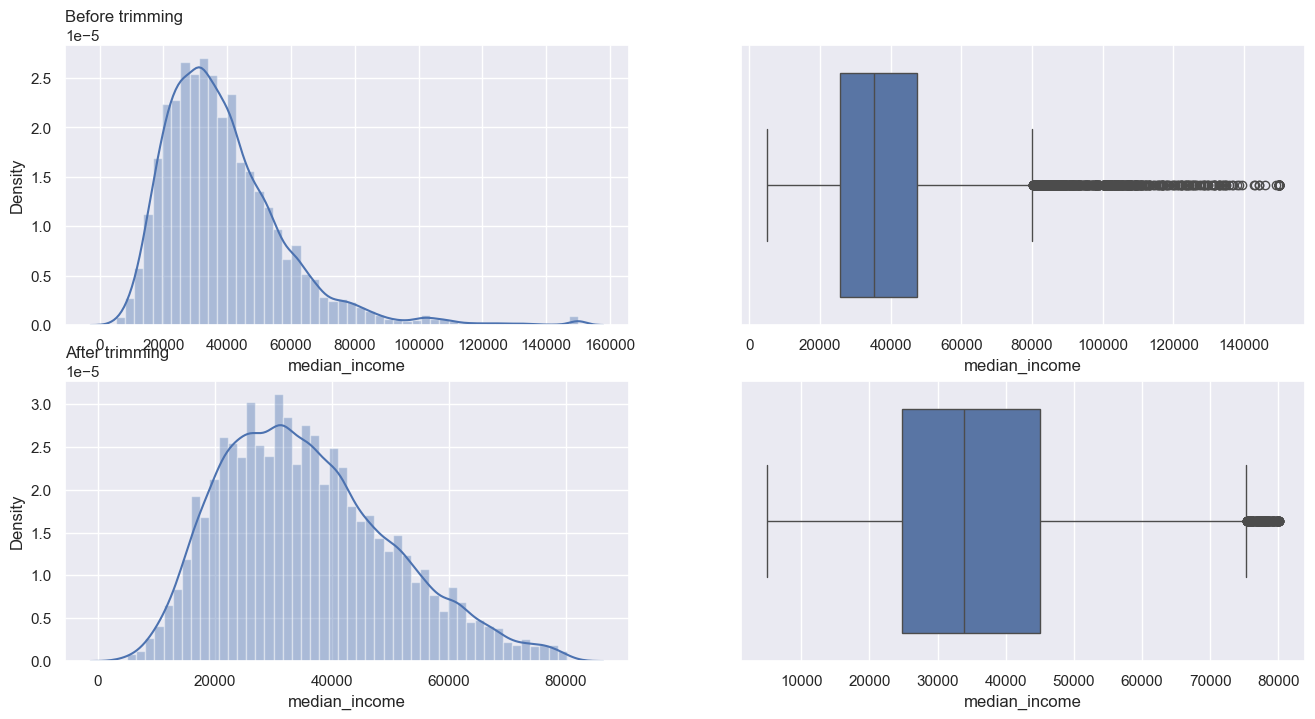

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title('Before trimming', loc='left')
sns.distplot(housing_copy['median_income'])
plt.subplot(2,2,2)
sns.boxplot(housing_copy['median_income'] , orient="h")
plt.subplot(2,2,3)
plt.title('After trimming', loc='left')
sns.distplot(housing_cleared_iqr['median_income'])
plt.subplot(2,2,4)
sns.boxplot(housing_cleared_iqr['median_income'], orient="h")
plt.show()


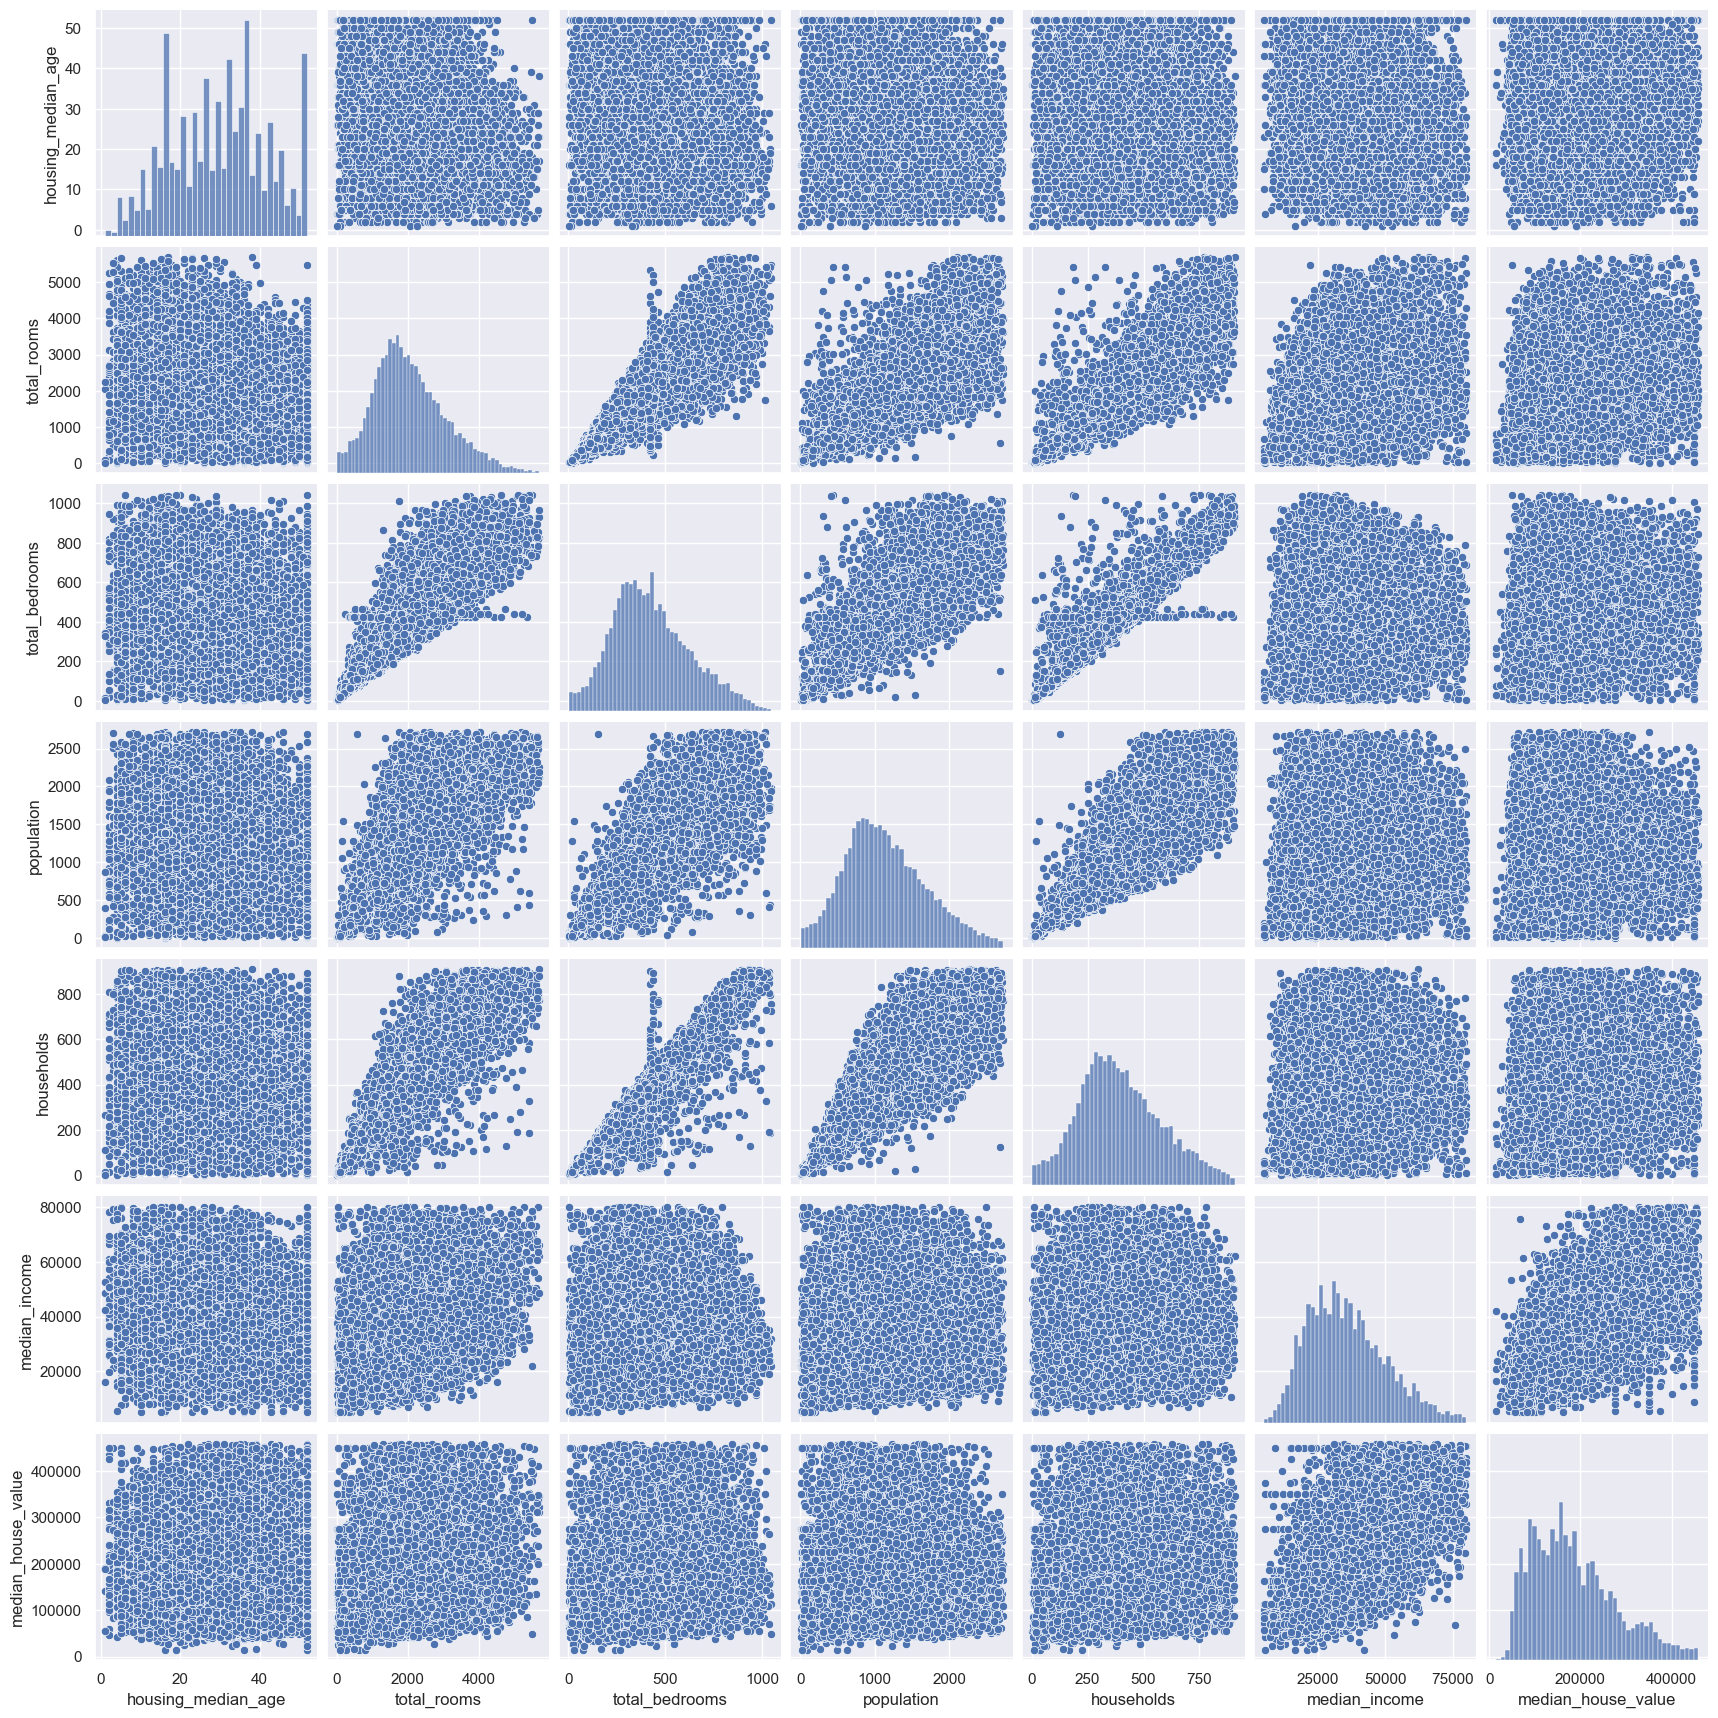

In [24]:
sns.pairplot(housing_cleared_iqr.iloc[:,2:9])

### Creating new features:

    rooms per household
    bedrooms per room
    population per household
    income per working population

https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb
https://www.kaggle.com/manisood001/california-housing-optimised-modelling

In [25]:
housing_cleared_iqr['rooms_per_household'] = housing_cleared_iqr['total_rooms']/housing_cleared_iqr['households']
housing_cleared_iqr['bedrooms_per_room']= housing_cleared_iqr['total_bedrooms']/housing_cleared_iqr['total_rooms']
housing_cleared_iqr['population_per_household'] = housing_cleared_iqr['population']/housing_cleared_iqr['households']
housing_cleared_iqr['income_per_working_population'] = housing_cleared_iqr['median_income']/(housing_cleared_iqr['population']-housing_cleared_iqr['households'])
housing_cleared_iqr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value ocean_proximity  \
2       496.0       177.0        72574.0            352100.0        NEAR BAY   
3       558.0       219.0        56431.0            341300.0        NEAR BAY   
4       565.0       259.0        38462.0            342200.0        NEAR BAY   
5       413.0       193.0        40368.0            269700.0        NEAR BAY   
6      1094.0       514.0        36591.0            299200.0        NEAR BAY   

   rooms_per_household  bedrooms_per_room  population_per_household  \
2             8.288136           0.129516                  2.802260   
3             5.817352           0.184458                  2.547945   
4             6.281853           0.172096                  2.181467   
5             4.761658           0.231774                  2.139896   
6             4.931907           0.192899                  2.128405   

   income_per_working_population  
2                     227.504702  
3                     166.463127  
4                     125.692810  
5                     183.490909  
6                      63.087931

#### Create house age bin

In [26]:
age_bins = np.linspace(min(housing_cleared_iqr["housing_median_age"]), max(housing_cleared_iqr["housing_median_age"]), 6)
age_bins

array([ 1. , 11.2, 21.4, 31.6, 41.8, 52. ])

In [27]:
group_names = ['Less than 12', '12 - 22', '22 - 32', '32 - 42', '42 - 53']

housing_cleared_iqr['median_age_bins'] = pd.cut(housing_cleared_iqr["housing_median_age"], age_bins, labels=group_names, include_lowest=True )

In [28]:
age_count = housing_cleared_iqr['median_age_bins'].value_counts()
age_count = age_count[:,]
age_count

median_age_bins
32 - 42         4879
22 - 32         3938
12 - 22         3789
42 - 53         3135
Less than 12    1155
Name: count, dtype: int64

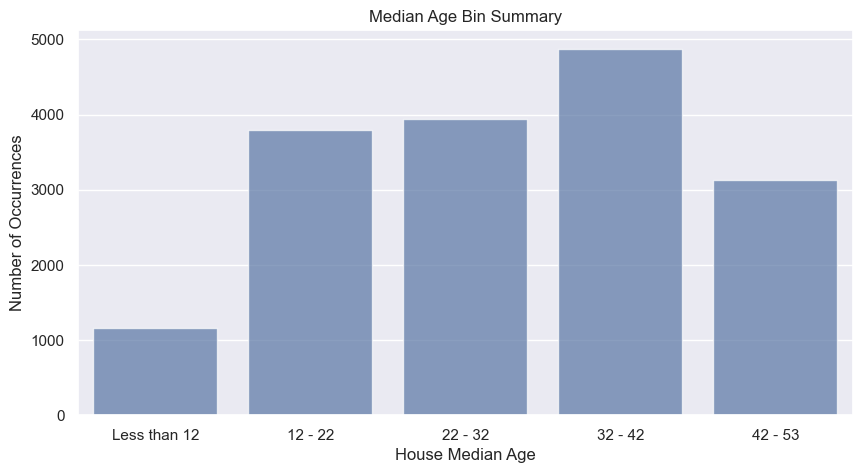

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x=age_count.index, y=age_count.values,alpha=0.7)
plt.title('Median Age Bin Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('House Median Age', fontsize=12)
plt.show()

In [30]:
#shows the count for each category of the "ocean_proximity" attribute
housing_cleared_iqr['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7248
INLAND        5710
NEAR OCEAN    2121
NEAR BAY      1812
ISLAND           5
Name: count, dtype: int64

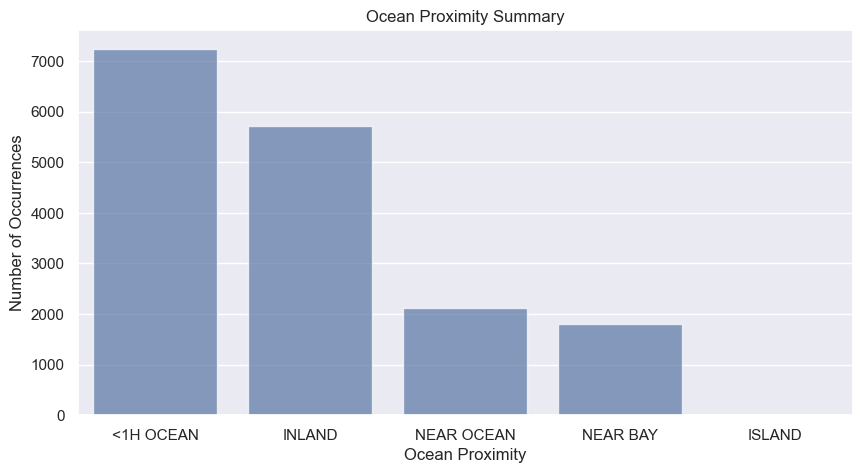

In [31]:
plt.figure(figsize=(10,5))
op_count = housing_cleared_iqr['ocean_proximity'].value_counts()
sns.barplot(x=op_count.index,y= op_count.values,alpha=0.7)
plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()

In [32]:
output = pd.pivot_table(data=housing_cleared_iqr, 
                        index=['median_age_bins'], 
                        columns=['ocean_proximity'], 
                        values='median_house_value',
                        aggfunc='median')
output

ocean_proximity  <1H OCEAN    INLAND    ISLAND  NEAR BAY  NEAR OCEAN
median_age_bins                                                     
Less than 12      210400.0  129250.0       NaN  197900.0    181200.0
12 - 22           218700.0  113750.0       NaN  221250.0    189300.0
22 - 32           219550.0   96400.0  368750.0  206250.0    200200.0
32 - 42           191100.0   90000.0       NaN  194300.0    212150.0
42 - 53           186100.0   93900.0  414700.0  225800.0    238250.0

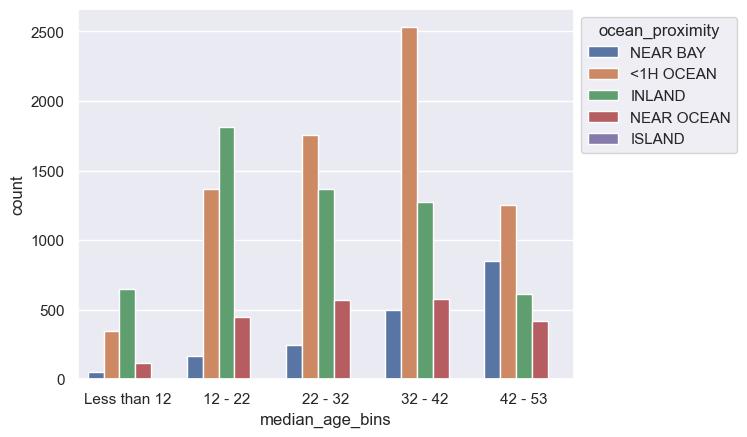

In [33]:
ax= sns.countplot(x='median_age_bins', hue='ocean_proximity', data=housing_cleared_iqr)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### Create a series of dummy variables from a categorical variable

#### When to use a Label Encoding vs. One Hot Encoding

This question generally depends on your dataset and the model which you wish to apply. But still, a few points to note before choosing the right encoding technique for your model:

We apply One-Hot Encoding when:

    The categorical feature is not ordinal (dog,cat,mouse)
    The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

    The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
    The number of categories is quite large as one-hot encoding can lead to high memory consumption


In [34]:
df = pd.get_dummies(housing_cleared_iqr, prefix='ocean_proximity_', columns=['ocean_proximity'])
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value  \
2       496.0       177.0        72574.0            352100.0   
3       558.0       219.0        56431.0            341300.0   
4       565.0       259.0        38462.0            342200.0   
5       413.0       193.0        40368.0            269700.0   
6      1094.0       514.0        36591.0            299200.0   

   rooms_per_household  bedrooms_per_room  population_per_household  \
2             8.288136           0.129516                  2.802260   
3             5.817352           0.184458                  2.547945   
4             6.281853           0.172096                  2.181467   
5             4.761658           0.231774                  2.139896   
6             4.931907           0.192899                  2.128405   

   income_per_working_population median_age_bins  ocean_proximity__<1H OCEAN  \
2                     227.504702         42 - 53                       False   
3                     166.463127         42 - 53                       False   
4                     125.692810         42 - 53                       False   
5                     183.490909         42 - 53                       False   
6                      63.087931         42 - 53                       False   

   ocean_proximity__INLAND  ocean_proximity__ISLAND  \
2                    False                    False   
3                    False                    False   
4                    False                    False   
5                    False                    False   
6                    False                    False   

   ocean_proximity__NEAR BAY  ocean_proximity__NEAR OCEAN  
2                       True                        False  
3                       True                        False  
4                       True                        False  
5                       True                        False  
6                       True                        False

In [35]:
df.shape

(16896, 19)

In [36]:
df.isna().sum() # checking any NA

longitude                        0
latitude                         0
housing_median_age               0
total_rooms                      0
total_bedrooms                   0
population                       0
households                       0
median_income                    0
median_house_value               0
rooms_per_household              0
bedrooms_per_room                0
population_per_household         0
income_per_working_population    0
median_age_bins                  0
ocean_proximity__<1H OCEAN       0
ocean_proximity__INLAND          0
ocean_proximity__ISLAND          0
ocean_proximity__NEAR BAY        0
ocean_proximity__NEAR OCEAN      0
dtype: int64

In [37]:
age_bin_dict ={'Less than 12':1, '12 - 22':2, '22 - 32':3, '32 - 42':4, '42 - 53':5}
df['median_age_bins'] =df.median_age_bins.map(age_bin_dict)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value  \
2       496.0       177.0        72574.0            352100.0   
3       558.0       219.0        56431.0            341300.0   
4       565.0       259.0        38462.0            342200.0   
5       413.0       193.0        40368.0            269700.0   
6      1094.0       514.0        36591.0            299200.0   

   rooms_per_household  bedrooms_per_room  population_per_household  \
2             8.288136           0.129516                  2.802260   
3             5.817352           0.184458                  2.547945   
4             6.281853           0.172096                  2.181467   
5             4.761658           0.231774                  2.139896   
6             4.931907           0.192899                  2.128405   

   income_per_working_population median_age_bins  ocean_proximity__<1H OCEAN  \
2                     227.504702               5                       False   
3                     166.463127               5                       False   
4                     125.692810               5                       False   
5                     183.490909               5                       False   
6                      63.087931               5                       False   

   ocean_proximity__INLAND  ocean_proximity__ISLAND  \
2                    False                    False   
3                    False                    False   
4                    False                    False   
5                    False                    False   
6                    False                    False   

   ocean_proximity__NEAR BAY  ocean_proximity__NEAR OCEAN  
2                       True                        False  
3                       True                        False  
4                       True                        False  
5                       True                        False  
6                       True                        False

In [38]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16896.000000  16896.000000        16896.000000  16896.000000   
mean    -119.613767     35.714332           29.666785   2071.883049   
std        2.005735      2.173749           12.210209   1025.323863   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.782500     33.940000           19.000000   1346.000000   
50%     -118.700000     34.400000           30.000000   1931.000000   
75%     -118.030000     37.750000           38.000000   2686.000000   
max     -114.490000     41.950000           52.000000   5688.000000   

       total_bedrooms    population    households  median_income  \
count    16896.000000  16896.000000  16896.000000   16896.000000   
mean       426.857718   1149.646899    399.439394   35764.317768   
std        199.481895    549.764399    186.177008   14459.995887   
min          2.000000      3.000000      2.000000    4999.000000   
25%        283.000000    753.000000    267.000000   24821.000000   
50%        404.000000   1086.000000    379.000000   33954.000000   
75%        553.250000   1505.000000    520.000000   45000.000000   
max       1044.000000   2721.000000    908.000000   80158.000000   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        16896.000000         16896.000000       16896.000000   
mean        185341.761127             5.329255           0.215502   
std          92053.652162             2.250584           0.060665   
min          14999.000000             0.846154           0.079169   
25%         112500.000000             4.442934           0.178640   
50%         169050.000000             5.175860           0.204637   
75%         240500.000000             5.930764           0.239647   
max         458300.000000           132.533333           1.840336   

       population_per_household  income_per_working_population  
count              16896.000000                   16896.000000  
mean                   2.959997                      83.470345  
std                    1.024935                     247.605113  
min                    0.692308                   -5360.000000  
25%                    2.457249                      31.370012  
50%                    2.839949                      50.637693  
75%                    3.302688                      81.438156  
max                   63.750000                   11250.000000

#### Get skewness of features

In [39]:
num_features=[ 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value',
        'rooms_per_household','bedrooms_per_room', 'population_per_household',
       'income_per_working_population']

In [40]:
skewness=[]
for i in num_features:
    skewness.append(housing_cleared_iqr[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

skewness
population_per_household       20.788016
income_per_working_population  19.617970
rooms_per_household            18.800473
bedrooms_per_room               4.318755
median_house_value              0.716980
total_rooms                     0.604721
median_income                   0.554373
total_bedrooms                  0.439438
population                      0.431214
households                      0.373926
housing_median_age             -0.003655

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical

###  Searching for Correlations:

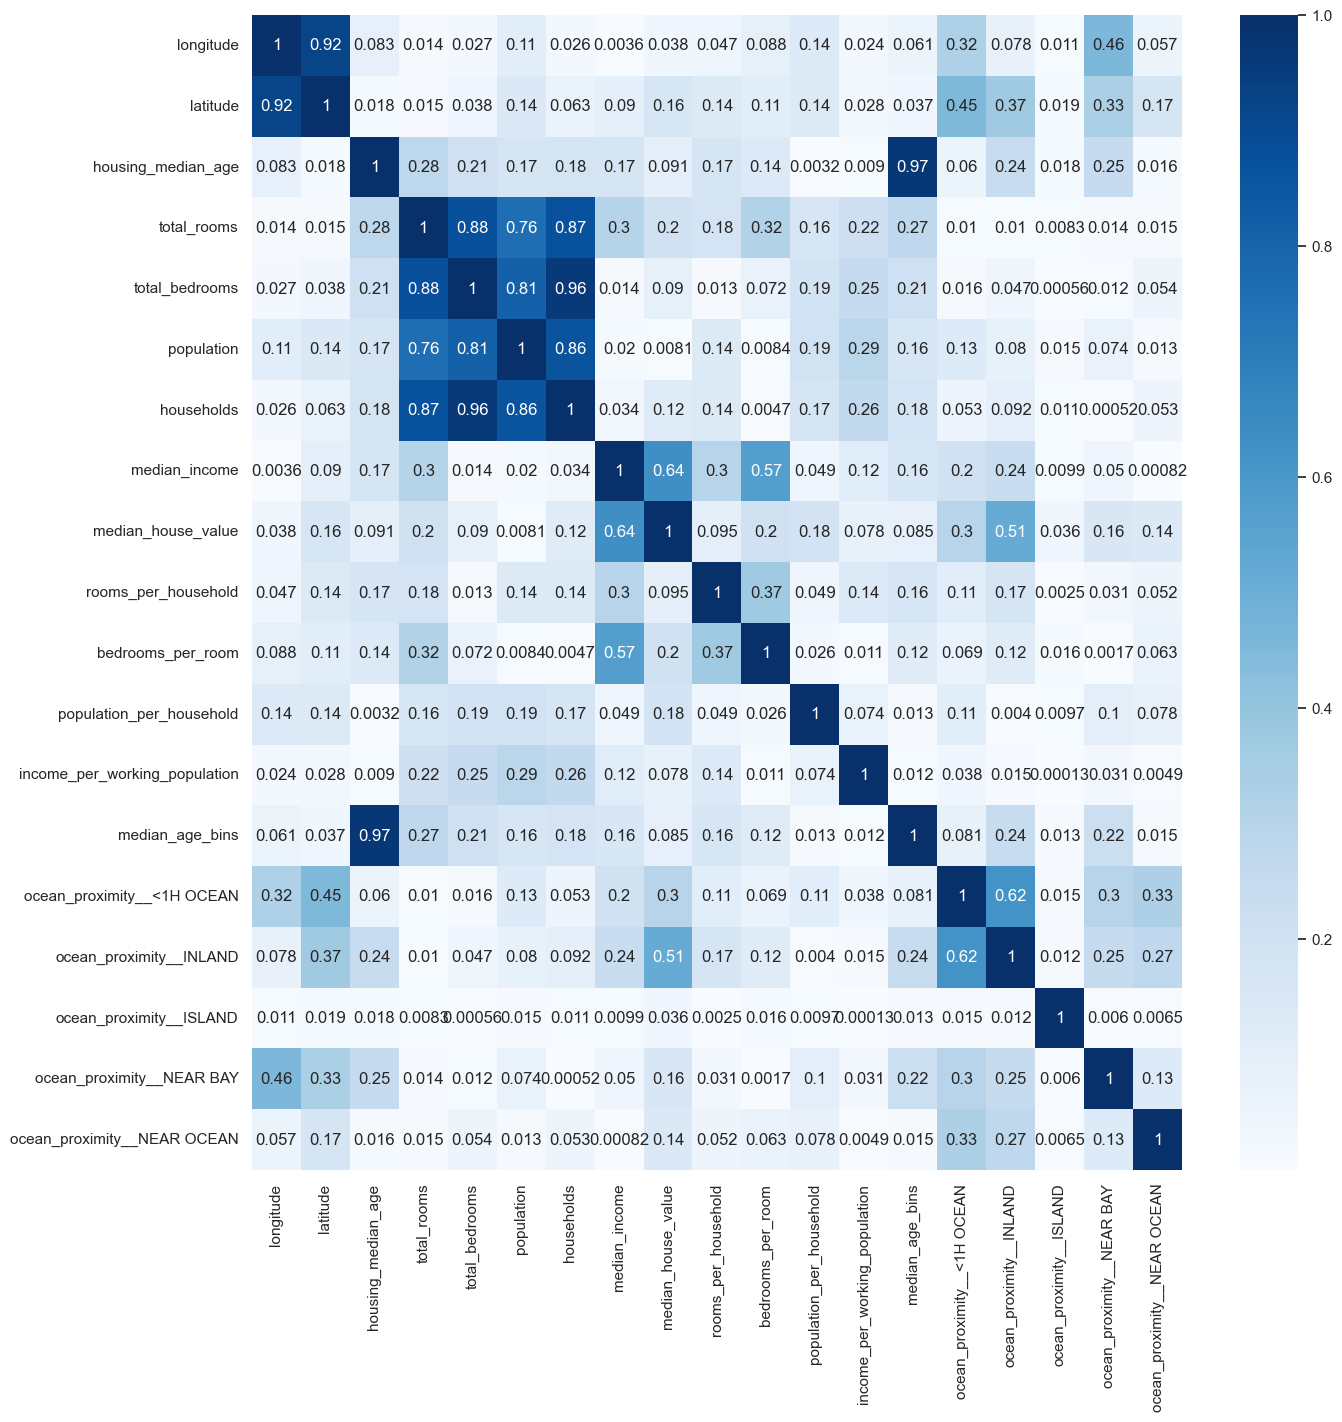

In [41]:
#df_corr2 = df.iloc[:,2:].corr()
df_corr2 = df.corr().abs()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr2, cmap="Blues", annot=True)
plt.show()

In [42]:
# How much does each attribute correlate with our target "median_house_value"?
df_corr2['median_house_value'].sort_values(ascending=False)

median_house_value               1.000000
median_income                    0.635459
ocean_proximity__INLAND          0.513782
ocean_proximity__<1H OCEAN       0.297662
total_rooms                      0.202045
bedrooms_per_room                0.198454
population_per_household         0.184420
latitude                         0.163546
ocean_proximity__NEAR BAY        0.155785
ocean_proximity__NEAR OCEAN      0.141471
households                       0.121735
rooms_per_household              0.094869
housing_median_age               0.090872
total_bedrooms                   0.089623
median_age_bins                  0.084619
income_per_working_population    0.078366
longitude                        0.038379
ocean_proximity__ISLAND          0.036466
population                       0.008078
Name: median_house_value, dtype: float64

In [43]:
corr_dict = df_corr2['median_house_value'].to_dict() #covert seeries to dictionary

In [44]:
# https://github.com/AvonleaFisher/Predicting-King-County-House-Prices-with-Multiple-Regression-Analysis/blob/master/Mod2_FinalProject_Notebook%20(1).ipynb

features = []
correlations = []
for idx, correlation in corr_dict.items():
    if correlation >= .30 and idx != 'median_house_value':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [45]:
print('Correlations with Price over 0.3')
display(corr_price_df)

Correlations with Price over 0.3


Correlations                 Features
0      0.635459            median_income
1      0.513782  ocean_proximity__INLAND

#### Median Income is the most promising attribute to get Median Hosung Price. 
#### Pearson's correlation coefficient =0.636

In [46]:
import pandas as pd

def find_multicollinear_features_corr(dataframe, threshold=0.8):
    """
    Find multicollinear features in a DataFrame based on correlation.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame containing predictor variables.
    - threshold (float): Threshold for identifying multicollinear features. Default is 0.8.

    Returns:
    - list: List of multicollinear feature names.
    """

    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Find features with correlation above the threshold
    multicollinear_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname_i = corr_matrix.columns[i]
                colname_j = corr_matrix.columns[j]
                multicollinear_features.add(colname_i)
                multicollinear_features.add(colname_j)

    multicollinear_features = list(multicollinear_features)

    return multicollinear_features

# Example usage:
# Assuming 'df' is your DataFrame with predictor variables
multicollinear_features = find_multicollinear_features_corr(df)
print("Multicollinear Features:", multicollinear_features)


Multicollinear Features: ['median_age_bins', 'latitude', 'total_bedrooms', 'total_rooms', 'longitude', 'population', 'households', 'housing_median_age']


In [47]:
# convert to numeric

df['ocean_proximity__<1H OCEAN'] = df ['ocean_proximity__<1H OCEAN'].map({False:0, True:1}) 
df['ocean_proximity__INLAND'] = df ['ocean_proximity__INLAND'].map({False:0, True:1}) 
df['ocean_proximity__ISLAND'] = df ['ocean_proximity__ISLAND'].map({False:0, True:1}) 
df['ocean_proximity__NEAR BAY'] = df ['ocean_proximity__NEAR BAY'].map({False:0, True:1}) 
df['ocean_proximity__NEAR OCEAN'] = df ['ocean_proximity__NEAR OCEAN'].map({False:0, True:1}) 


### Define functions for modeling

In [48]:
# https://www.kaggle.com/code/mwaseem75/practical-introduction-to-10-regression-algorithm
from sklearn import metrics

def cross_val(model):
    pred = cross_val_score(model, X_feature, y_target, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

#### find the best transformation to the response variable or predictor variables

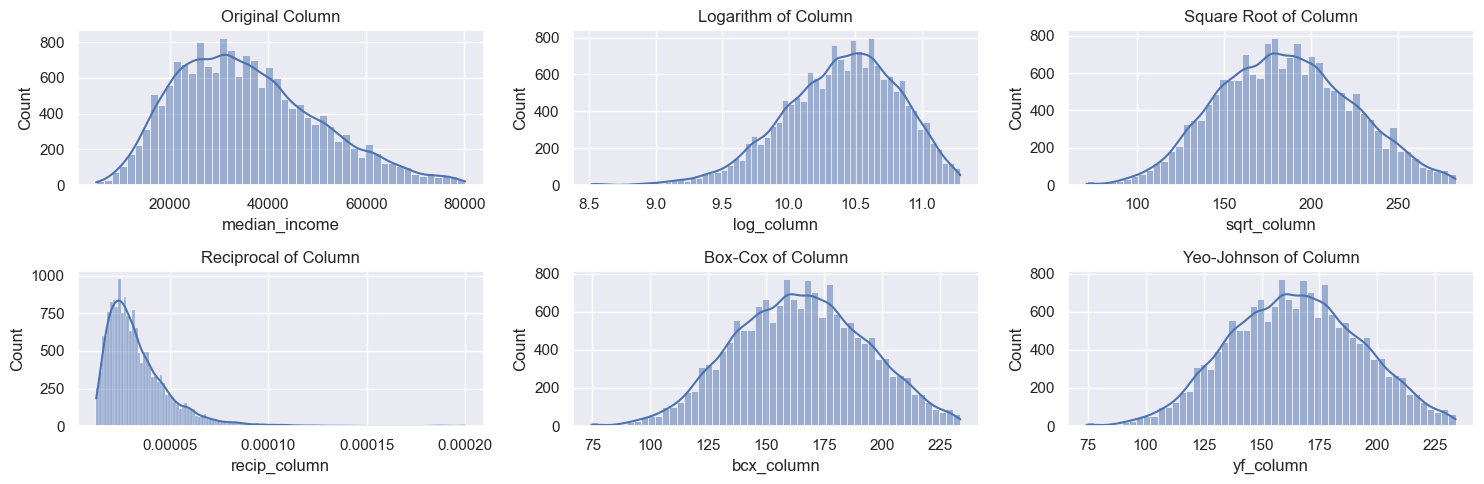

In [49]:
df_temp=df.copy()

# Add columns for logarithm and square root
df_temp['log_column'] = np.log1p(df_temp['median_income'])
df_temp['sqrt_column'] = np.sqrt(df_temp['median_income'])
df_temp['recip_column'] = 1/df_temp['median_income']

from scipy.stats import boxcox
bcx_target, lam = boxcox(df_temp['median_income'])
df_temp['bcx_column'] = bcx_target
#lam is the best lambda for the distribution

from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(df_temp['median_income'])
df_temp['yf_column'] = yf_target

# Set up the grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

# Plot the density plot for the original column
sns.histplot(data=df_temp, x='median_income', kde=True, ax=axes[0][0])
axes[0][0].set_title('Original Column')

# Plot the density plot for the logarithm of the column
sns.histplot(data=df_temp, x='log_column', kde=True, ax=axes[0][1])
axes[0][1].set_title('Logarithm of Column')

# Plot the density plot for the square root of the column
sns.histplot(data=df_temp, x='sqrt_column', kde=True, ax=axes[0][2])
axes[0][2].set_title('Square Root of Column')

sns.histplot(data=df_temp, x='recip_column', kde=True, ax=axes[1][0])
axes[1][0].set_title('Reciprocal of Column')

# Plot the density plot for the logarithm of the column
sns.histplot(data=df_temp, x='bcx_column', kde=True, ax=axes[1][1])
axes[1][1].set_title('Box-Cox of Column')

# Plot the density plot for the square root of the column
sns.histplot(data=df_temp, x='yf_column', kde=True, ax=axes[1][2])
axes[1][2].set_title('Yeo-Johnson of Column')



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### * All the time Yeo-Johnson will not be the right choice. For some kind of data, Box-cox will work better so we must go with the best transformation technique.

#### * from https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9

### Simple Linear Regression

#### Model 1 : using median_income and 'ocean_proximity__INLAND' features

In [50]:
dfm1 = df.copy()

In [51]:
X_feature = dfm1[['median_income','ocean_proximity__INLAND'] ] # feature
y_target = dfm1['median_house_value'] # target

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size = 0.2, random_state = 1)

In [53]:
# Create linear regression object
regr_model1 = LinearRegression()

# Train the model using the training sets
regr_model1.fit(X_train, y_train)

#Prediciting Y from Linear regression Model
y_pred = regr_model1.predict(X_test)

#### Model 1 Evaluation

In [54]:
# print the intercept
print(regr_model1.intercept_)

86546.04396065319


In [55]:
coeff_df = pd.DataFrame(regr_model1.coef_, X_feature.columns, columns=['Coefficient'])
coeff_df

Coefficient
median_income                3.462005
ocean_proximity__INLAND -75042.983118

In [56]:
print('Model 1 Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred)


results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, y_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model 1 Test set evaluation:
_____________________________________
MAE: 46783.721447528216
MSE: 4024713757.6622686
RMSE: 63440.631756487644
R2 Square 0.5344511744068507
__________________________________


Model           MAE           MSE          RMSE  R2 Square  \
0  Linear Regression  46783.721448  4.024714e+09  63440.631756   0.534451   

   Cross Validation  
0          0.405531

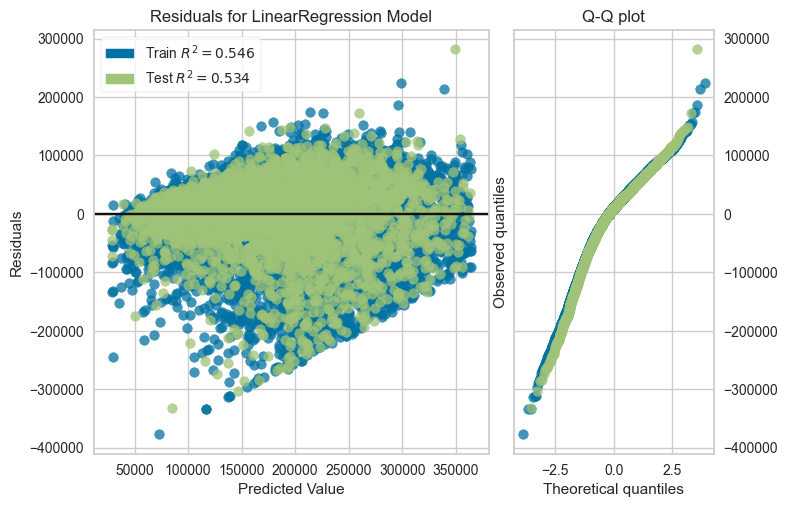

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [57]:
# https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regr_model1, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Text(0.5, 1.0, 'Residual plot')

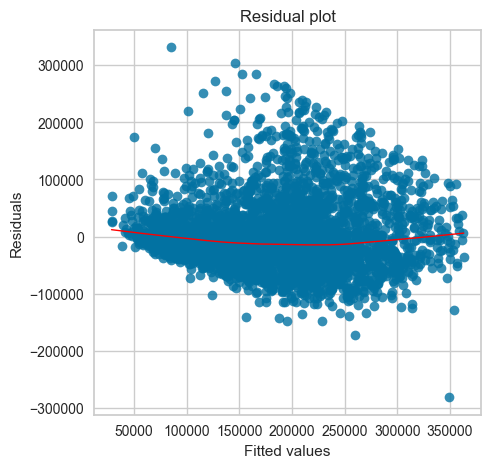

In [58]:
# https://seaborn.pydata.org/generated/seaborn.residplot.html
plt.figure(figsize=(5,5))
sns.regplot(x=y_pred.reshape(-1),y=y_test-y_pred, lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title('Residual plot')

### Homoscedasticity
    Homoscedasticity in a model means that the error is constant along the values of the dependent variable. 
    The best way for checking homoscedasticity is to make a scatterplot with the residuals against the dependent variable.

#### All we are looking for here is whether the conditional mean line deviates from the horizontal reference line, the two lines overlap for the most part. Although there is an upward trend on the right, very few points exist there so some deviation is expected. Overall, it does not look like there is evidence that the assumption of linearity has been violated.

In [59]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

residuals_test = abs(y_test) - abs(y_pred)

# Add a constant column to the design matrix
X_train_const = sm.add_constant(X_train, has_constant='add')
X_test_const = sm.add_constant(X_test, has_constant='add')

# Example: Breusch-Pagan test
_, p_value_bp_test, _, _ = het_breuschpagan(residuals_test, X_test_const)
print(f"Breusch-Pagan Test (Test Data) - p-value: {p_value_bp_test}")

# White Test on test data
_, p_value_white_test, _, _ = het_white(residuals_test, X_test_const)
print(f"White Test (Test Data) - p-value: {p_value_white_test}")

Breusch-Pagan Test (Test Data) - p-value: 1.1976022621757442e-16
White Test (Test Data) - p-value: 3.5342858097495e-20


####  the p-value is below a chosen significance level , we reject the null hypothesis of homoscedasticity.

Text(0.5, 1.0, 'Normal Q-Q Plot')

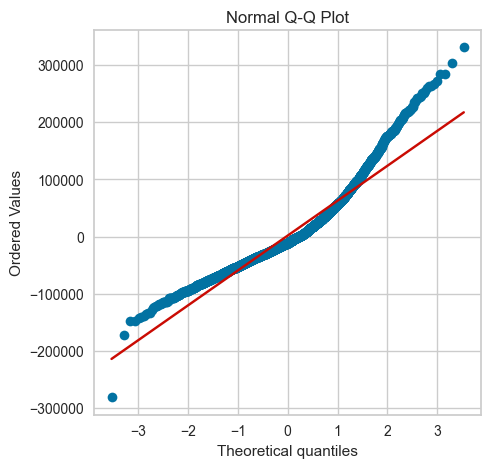

In [60]:
from scipy import stats

plt.figure(figsize=(5,5))
stats.probplot(y_test-y_pred, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

In [61]:
from scipy.stats import shapiro   # Shapiro Wilk Normality Test
shapiro(y_test-y_pred)

ShapiroResult(statistic=0.9271768533353091, pvalue=1.0133076650470683e-37)

#### From the result, we see that W=0.927 and the p-value is less than 0.05. Therefore, we reject the null hypothesis that the data comes from a normal distribution (Null hypothesis : the sample comes from a normal distribution)

#### * Its important to note that there are limitations to the Shapiro-Wilk test. As the dataset being evaluated gets larger, the Shapiro-Wilk test becomes more sensitive to small deviations which leads to a greater probability of rejecting the null hypothesis (null hypothesis being the values come from a normal distribution). 
#### *  from: https://uc-r.github.io/assumptions_normality

#### Model 1:
####    Homoscedasticity: Not Heteroscedastic
####    Normality of residuals: Not normal

### Model 2
#### Apply a transformation to the response variable or predictor variables

In [62]:
dfm2 = df.copy()
X_feature2 = dfm2[['median_income','ocean_proximity__INLAND'] ] # feature
y_target2 = dfm2['median_house_value'] # target
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_feature2, y_target2, test_size = 0.2, random_state = 2)

In [63]:
# data has a single feature
#X_train2= X_train2.values.reshape(-1, 1)   
#X_test2 = X_test2.values.reshape(-1, 1)

In [64]:
#scaler = RobustScaler()
#X_train2_scaled = scaler.fit_transform(X_train2)
#X_test2_scaled = scaler.transform(X_test2)


# Create linear regression object
regr_model2= LinearRegression()

# Train the model using the training sets
regr_model2.fit(X_train2, np.sqrt(y_train2) )

#Prediciting Y from Linear regression Model
y_pred2 = regr_model2.predict(X_test2 )

#### Model 2 Evaluation

In [65]:
# print the intercept
print(regr_model2.intercept_)
coeff_df2 = pd.DataFrame(regr_model2.coef_, X_feature2.columns, columns=['Coefficient'])
coeff_df2

305.47507476190844


Coefficient
median_income               0.004017
ocean_proximity__INLAND   -93.781832

In [66]:
print('Model 2 Test set evaluation:\n_____________________________________')
print_evaluate(y_test2,  np.square(y_pred2) )


results_df2 = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test2, np.square(y_pred2) )]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df2

Model 2 Test set evaluation:
_____________________________________
MAE: 45908.381710633425
MSE: 3996167535.829231
RMSE: 63215.24765299295
R2 Square 0.5404545087323427
__________________________________


Model           MAE           MSE          RMSE  R2 Square
0  Linear Regression  45908.381711  3.996168e+09  63215.247653   0.540455

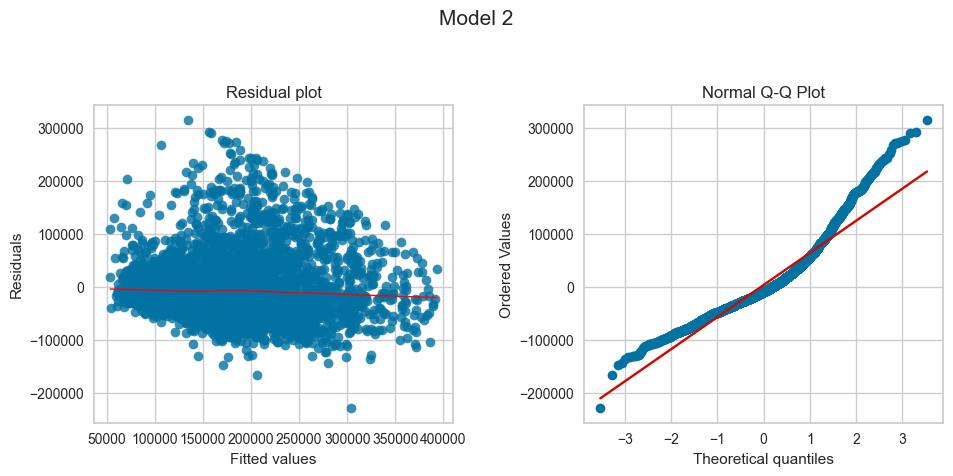

In [67]:
# Set up the grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Model 2', fontsize=15)

sns.regplot(x=np.square(y_pred2), y=y_test2 - np.square(y_pred2), lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1}, ax=axes[0])
axes[0].set_title ('Residual plot')
axes[0].set_xlabel ("Fitted values")
axes[0].set_ylabel ("Residuals")

stats.probplot(y_test2 - np.square(y_pred2), dist="norm", plot=axes[1])
axes[1].set_title ("Normal Q-Q Plot")

# Adjust layout
plt.tight_layout(pad=2.0)

# Show the plot
plt.show()

### Model 3:
#### Robust regression methods, such as Huber or RANSAC, are less sensitive to outliers and can handle heteroscedasticity better.

In [68]:
dfm3 = df.copy()
X_feature3 = dfm3[['median_income','ocean_proximity__INLAND'] ] # feature
y_target3 = dfm3['median_house_value'] # target
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_feature3, y_target3, test_size = 0.2, random_state = 3)

In [69]:
from sklearn.linear_model import RANSACRegressor

ransac_model = RANSACRegressor(
                         min_samples=50, max_trials=100,
                         random_state=42,
                         residual_threshold=10)
ransac_model.fit(X_train3, y_train3 )

#Prediciting Y from regression Model
y_pred3 = ransac_model.predict(X_test3)

In [70]:
# print the intercept
print(ransac_model.estimator_.intercept_)
coeff_df3 = pd.DataFrame(ransac_model.estimator_.coef_, X_feature3.columns, columns=['Coefficient'])
coeff_df3

51625.021048613286


Coefficient
median_income                4.025045
ocean_proximity__INLAND -55285.416518

In [71]:
print('Model 3 Test set evaluation:\n_____________________________________')
print_evaluate(y_test3,  y_pred3 )


results_df3 = pd.DataFrame(data=[["RANSAC Regression", *evaluate(y_test3, y_pred3 )]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df3

Model 3 Test set evaluation:
_____________________________________
MAE: 44944.635947391886
MSE: 3891073085.8944063
RMSE: 62378.466524069074
R2 Square 0.5421167337340371
__________________________________


Model           MAE           MSE          RMSE  R2 Square
0  RANSAC Regression  44944.635947  3.891073e+09  62378.466524   0.542117

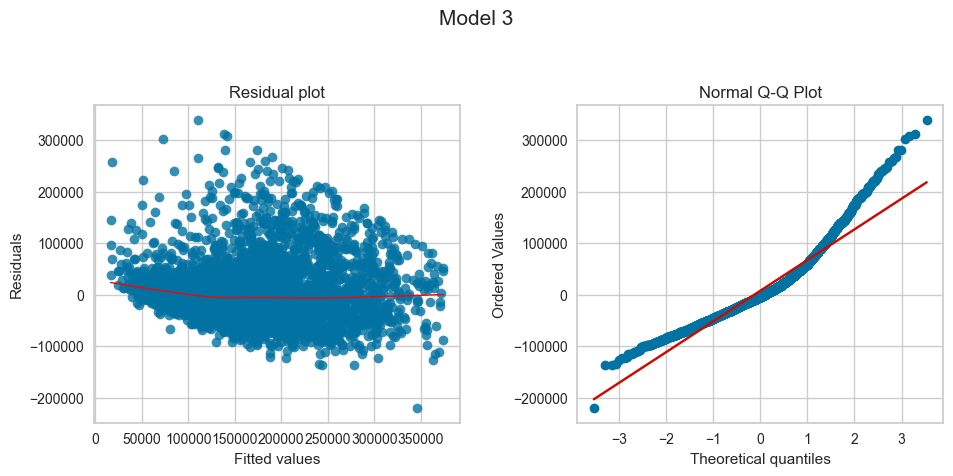

In [72]:
# Set up the grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Model 3', fontsize=15)

sns.regplot(x=y_pred3, y=y_test3 - y_pred3, lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1}, ax=axes[0])
axes[0].set_title ('Residual plot')
axes[0].set_xlabel ("Fitted values")
axes[0].set_ylabel ("Residuals")

stats.probplot(y_test3 - y_pred3, dist="norm", plot=axes[1])
axes[1].set_title ("Normal Q-Q Plot")

# Adjust layout
plt.tight_layout(pad=2.0)

# Show the plot
plt.show()

### Model 4:
#### scaling using lasso regression see if improve the R2 score

In [118]:
# multicollinear_features columns
#dfm2=df.drop(multicollinear_features, axis=1)
dfm4=df.copy()

In [119]:
X_feature4 =dfm4.drop(['median_house_value'], axis=1) # feature
y_target4 = dfm4['median_house_value'] # target

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_feature4, y_target4, test_size=0.2, random_state=42)

In [121]:
scaler = RobustScaler()
X_train4_scaled = scaler.fit_transform(X_train4)
X_test4_scaled = scaler.fit_transform(X_test4)

In [122]:
# https://www.kaggle.com/code/deepakdodi/lasso-and-ridge-hypertuning-over-gapminder-dataset/notebook

# Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train4_scaled, y_train4 )
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 1e-08}
0.6340572481385177


In [123]:
# Set best alpha
lasso_best = Lasso(alpha=lasso_model.best_params_['alpha'])
lasso_best.fit(X_train4_scaled, y_train4 )

Lasso(alpha=1e-08)

In [124]:
#Prediciting Y from regression Model
y_pred4 = lasso_best.predict(X_test4_scaled)

In [125]:
# print the intercept
print(lasso_best.intercept_)
coeff_df4 = pd.DataFrame(lasso_best.coef_, X_feature4.columns, columns=['Coefficient'])
coeff_df4

186749.73036865916


Coefficient
longitude                      -95884.380411
latitude                       -91918.318762
housing_median_age              35778.658077
total_rooms                     -7095.447238
total_bedrooms                  13408.410300
population                     -44987.756329
households                      43033.999449
median_income                   77920.131985
rooms_per_household              3863.003901
bedrooms_per_room                7925.902262
population_per_household        -2535.785641
income_per_working_population     109.039768
median_age_bins                -22181.277131
ocean_proximity__<1H OCEAN      19874.322826
ocean_proximity__INLAND        -16156.432107
ocean_proximity__ISLAND        204848.793311
ocean_proximity__NEAR BAY        6873.712676
ocean_proximity__NEAR OCEAN     15773.928386

In [126]:
print('Model 4 Test set evaluation:\n_____________________________________')
print_evaluate(y_test4, y_pred4 )


results_df4 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test4, y_pred4 )]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df4

Model 4 Test set evaluation:
_____________________________________
MAE: 43497.18865415682
MSE: 3308809465.858096
RMSE: 57522.251919219016
R2 Square 0.6059100697332137
__________________________________


Model           MAE           MSE          RMSE  R2 Square
0  Lasso Regression  43497.188654  3.308809e+09  57522.251919    0.60591

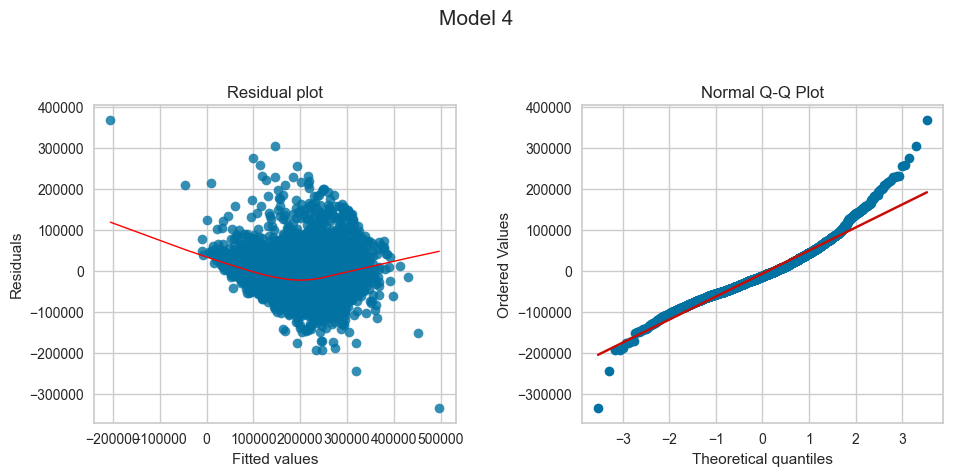

In [127]:
# Set up the grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Model 4', fontsize=15)

sns.regplot(x=y_pred4, y=y_test4 - y_pred4, lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1}, ax=axes[0])
axes[0].set_title ('Residual plot')
axes[0].set_xlabel ("Fitted values")
axes[0].set_ylabel ("Residuals")

stats.probplot(y_test4 - y_pred4, dist="norm", plot=axes[1])
axes[1].set_title ("Normal Q-Q Plot")

# Adjust layout
plt.tight_layout(pad=2.0)

# Show the plot
plt.show()

### Model 5

#### Feature selection using SelectFromModel and LassoCV

In [138]:
dfm5=df.copy()
X_feature5 =dfm4.drop(['median_house_value'], axis=1) # feature
y_target5 = dfm4['median_house_value'] # target

X_train5, X_test5, y_train5, y_test5 = train_test_split(X_feature5, y_target5, test_size=0.2, random_state=55)

In [139]:
scaler = RobustScaler()
X_train5_scaled = scaler.fit_transform(X_train5)
#X_test5_scaled = scaler.fit_transform(X_test5)

In [140]:
from sklearn.feature_selection import SelectFromModel


# It automatically evaluates performance over several folds in order to get the ideal regularization strength (alpha). 

lasso_cv = LassoCV(cv=10)  
lasso_cv.fit(X_train5_scaled, y_train5)

# Feature selection

sfm = SelectFromModel(lasso_cv, prefit=True)
sfm.fit(scaler.transform(X_train5), y_train5)
X_train_selected = sfm.transform(scaler.transform(X_train5))
X_test_selected = sfm.transform(scaler.transform(X_test5))

# Train model
lasso_cv.fit(X_train_selected, y_train5)

LassoCV(cv=10)

In [141]:
# eval model
y_pred5 = lasso_cv.predict(X_test_selected)

In [142]:
# print the intercept and coefficients
print(sfm.estimator_.intercept_)
coeff_df5 = pd.DataFrame(sfm.estimator_.coef_, X_feature5.columns, columns=['Coefficient'])
coeff_df5

201001.76425642765


Coefficient
longitude                     -90873.073849
latitude                      -87132.991458
housing_median_age             30158.289911
total_rooms                    -2318.864290
total_bedrooms                 11234.741964
population                    -43415.711020
households                     38736.710292
median_income                  76600.652403
rooms_per_household             2677.056370
bedrooms_per_room               8462.740254
population_per_household       -2859.296937
income_per_working_population    234.210797
median_age_bins               -16749.045608
ocean_proximity__<1H OCEAN      3101.992453
ocean_proximity__INLAND       -33827.405687
ocean_proximity__ISLAND            0.000000
ocean_proximity__NEAR BAY      -8247.915883
ocean_proximity__NEAR OCEAN        0.000000

In [143]:
print('Model 5 Test set evaluation:\n_____________________________________')
print_evaluate(y_test5, y_pred5 )


results_df5 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test5, y_pred5 )]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df5

Model 5 Test set evaluation:
_____________________________________
MAE: 40895.718623158566
MSE: 2983846259.437975
RMSE: 54624.59390638959
R2 Square 0.6479315187953997
__________________________________


Model           MAE           MSE          RMSE  R2 Square
0  Lasso Regression  40895.718623  2.983846e+09  54624.593906   0.647932

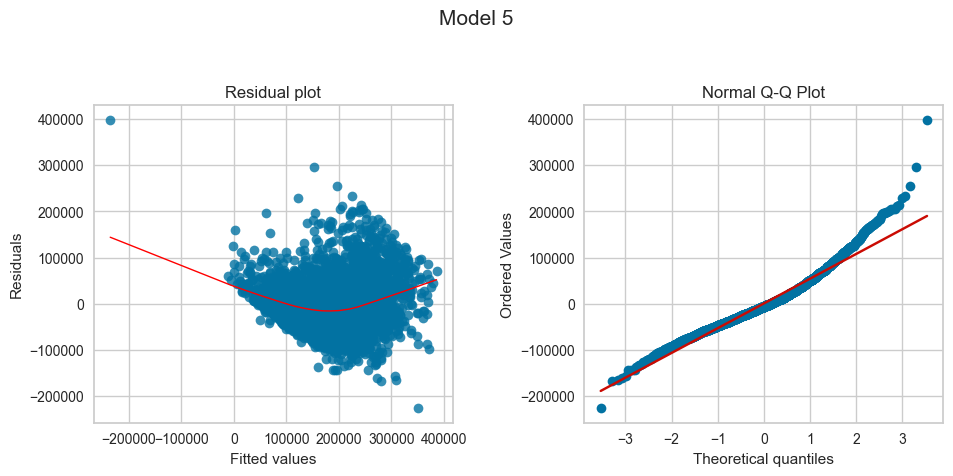

In [144]:
# Set up the grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Model 5', fontsize=15)

sns.regplot(x=y_pred5, y=y_test5 - y_pred5, lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1}, ax=axes[0])
axes[0].set_title ('Residual plot')
axes[0].set_xlabel ("Fitted values")
axes[0].set_ylabel ("Residuals")

stats.probplot(y_test5 - y_pred5, dist="norm", plot=axes[1])
axes[1].set_title ("Normal Q-Q Plot")

# Adjust layout
plt.tight_layout(pad=2.0)

# Show the plot
plt.show()

#### Model 5
    Homoscedasticity: Not Heteroscedastic
    Normality of residuals: Yes
    Highest R2 and lowest RMSE score among other models

        REFERENCES:
    
    https://www.statisticssolutions.com/assumptions-of-linear-regression/
    https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

    https://machinelearningmastery.com/elastic-net-regression-in-python/
    https://jhimlib.github.io/CaliforniaHousingPricePrediction/
    https://github.com/sonarsushant/California-House-Price-Prediction
    https://medium.com/@gurupratap.matharu/end-to-end-machine-learning-project-on-predicting-housing-prices-using-regression-7ab7832840ab
    https://github.com/subhadipml/California-Housing-Price-Prediction
    https://www.kaggle.com/subashdump/california-housing-price-prediction
    https://jmyao17.github.io/Kaggle/California_Housing_Prices.html
    https://github.com/Musa70/Data-Preprocessing/blob/main/Data%20Preprocessing.ipynb

    https://www.kaggle.com/esotariq/california-housing-tutorial
    https://www.kaggle.com/subashdump/california-housing-price-prediction
    https://www.kaggle.com/faressayah/linear-regression-house-price-prediction
    https://www.kaggle.com/manisood001/california-housing-optimised-modelling
    https://www.kaggle.com/harrywang/housing-price-prediction

    https://towardsdatascience.com/ways-to-evaluate-regression-models-77a3ff45ba70
    https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b
    https://medium.com/acing-ai/how-to-evaluate-regression-models-d183b4f5853d
    https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
    https://www.aionlinecourse.com/tutorial/machine-learning/evaluating-regression-models-performance
    https://www.kdnuggets.com/2021/03/metrics-evaluating-regression-models-part2.html


    https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
    https://boostedml.com/2018/08/testing-linear-regression-assumptions-the-kaggle-housing-price-dataset.html

    https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
    https://www.bingyune.com/blog/housing-crisis-outliers
    https://heartbeat.fritz.ai/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07

    https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b
    https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
    https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

    https://www.youtube.com/watch?v=kUsNb_gOo_s
    https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb
    https://www.youtube.com/watch?v=5t72xhgcz5I

    https://www.geeksforgeeks.org/feature-selection-using-selectfrommodel-and-lassocv-in-scikit-learn/
    https://www.blog.trainindata.com/lasso-feature-selection-with-python/    